# **Text Normalization in English**

In [22]:
import re
import pandas as pd
from google.colab import drive
import seaborn as sns

In [7]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/EnglishNewsDataset.xlsx'
df = pd.read_excel(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NEWS,CLASS
0,$5 20 piece chicken nuggets didn't help McDona...,business
1,$A falls as Ukraine tensions escalate,business
2,$A lower amid Ukraine crisis pessimism,business
3,$A lower as Ukraine tensions increase,business
4,10 Things You Need To Know Before The Opening ...,business


In [8]:
df = df.drop(columns=['CLASS'])
df = df.dropna(subset=["NEWS"])
df = df.drop_duplicates(subset=["NEWS"])
df = df.reset_index(drop=True)
df

,NEWS
0,$5 20 piece chicken nuggets didn't help McDona...
1,$A falls as Ukraine tensions escalate
2,$A lower amid Ukraine crisis pessimism
3,$A lower as Ukraine tensions increase
4,10 Things You Need To Know Before The Opening ...
...,...
4948,Samsung giving three months NOW TV movie pass ...
4949,LG Google Nexus 5 vs Samsung Galaxy Grand 2 B...
4950,Samsung Galaxy Grand Duos vs Samsung Galaxy Gr...
4951,iPhone 6 holographic projector phone concept v...


In [9]:
df['length'] = df['NEWS'].apply(lambda row: len(row.split()))
print('Mean length: ', df['length'].mean())

Mean length:  10.951140722794266


<Axes: xlabel='length', ylabel='Count'>

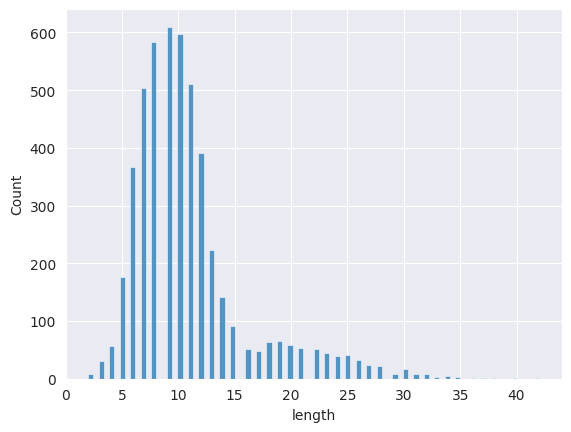

In [10]:
sns.set_style(style="darkgrid")
sns.histplot(df['length'])


In [12]:
import re

def clean_text_en(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'\bRT\b', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'http\S+|https\S+|www\.\S+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    return text
df["clean_text"] = df["NEWS"].apply(clean_text_en)


In [13]:
# Check first few rows
df[['NEWS', 'clean_text']].head()


,NEWS,clean_text
0,$5 20 piece chicken nuggets didn't help McDona...,piece chicken nuggets didn t help mcdonald s r...
1,$A falls as Ukraine tensions escalate,a falls as ukraine tensions escalate
2,$A lower amid Ukraine crisis pessimism,a lower amid ukraine crisis pessimism
3,$A lower as Ukraine tensions increase,a lower as ukraine tensions increase
4,10 Things You Need To Know Before The Opening ...,things you need to know before the opening bell
